<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [ ]:
import pandas as pd
import psycopg2
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432
# Представим, что тут ничего не было)

In [12]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [13]:
# Запрос для подсчета количества вакансий
query_3_1 = '''
SELECT COUNT(*) AS total_vacancies
FROM VACANCIES;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_3_1, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\1544071881.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


In [14]:
# Вывод результата
print(f"Количество вакансий: {df}")


Количество вакансий:    total_vacancies
0            49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [15]:
# Запрос для подсчета количества работодателей
query_3_2 = '''
SELECT COUNT(*) AS employer_count
FROM employers;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_3_2, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2591606291.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


In [16]:
# Вывод результата
print(f"Количество работодателей: {df}")

Количество работодателей:    employer_count
0           23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [17]:
# Запрос для подсчета количества регионов
query_3_3 = '''
SELECT COUNT(DISTINCT name) AS unique_area_count
FROM areas;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_3_3, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\1609916213.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


In [18]:
# Вывод результата
print(f"Количество регионов: {df}")

Количество регионов:    unique_area_count
0               1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [19]:
# Запрос для подсчета количества сфер деятельности
query_3_4 = '''
SELECT COUNT(DISTINCT name) AS unique_industries
FROM industries;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_3_4, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2412317821.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


In [20]:
# Вывод результата
print(f"Количество сфер деятельности: {df}")

Количество сфер деятельности:    unique_industries
0                294


- Общее количество вакансий: В базе данных содержится 49,197 вакансий. Это свидетельствует о значительном объеме информации, что может быть полезно для анализа рынка труда и выявления тенденций.

- Количество работодателей: В системе зарегистрировано 23,501 работодателей. Это говорит о разнообразии предложений на рынке и о наличии множества компаний, готовых нанимать сотрудников.

- Региональное распределение: В базе данных представлено 1,362 региона. Это может указывать на широкий географический охват вакансий, что позволяет кандидатам рассматривать возможности трудоустройства в различных местах.

- Сферы деятельности: Зарегистрировано 294 сферы деятельности. Это разнообразие может помочь соискателям найти вакансии в интересующих их областях и позволит работодателям более точно нацеливаться на нужные кадры.

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [22]:
# Запрос
query_4_1 = '''
SELECT a.name AS area_name, COUNT(v.id) AS cnt
FROM areas a
LEFT JOIN vacancies v ON a.id = v.area_id
GROUP BY a.name
ORDER BY cnt DESC
LIMIT 5;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_4_1, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\28742490.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


In [23]:
# Вывод результата
print(f"Пятёрка лидеров по кол-ву вакансий: {df}")

Пятёрка лидеров по кол-ву вакансий:          area_name   cnt
0           Москва  5333
1  Санкт-Петербург  2851
2            Минск  2112
3      Новосибирск  2006
4           Алматы  1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [24]:
# Запрос для подсчета количества вакансий...
query_4_2 = '''
SELECT COUNT(*) AS count_vacancies
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_4_2, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2374093940.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


In [25]:
# Вывод результата
print(f"Количество вакансий,где заполнено хотя бы одно из двух полей с зарплатой: {df}")

Количество вакансий,где заполнено хотя бы одно из двух полей с зарплатой:    count_vacancies
0            24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [26]:
# Запрос
query_4_3 = '''
SELECT 
    ROUND(AVG(salary_from)) AS average_salary_from,
    ROUND(AVG(salary_to)) AS average_salary_to
FROM vacancies
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_4_3, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\554931089.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


In [27]:
# Вывод результата
print(f"Нуль \ Нижняя планка \ Верхняя планка: {df}")

Нуль \ Нижняя планка \ Верхняя планка:    average_salary_from  average_salary_to
0              71065.0           110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [28]:
# Запрос
query_4_4 = '''
SELECT 
    schedule, 
    employment, 
    COUNT(*) AS vacancy_count
FROM 
    vacancies
GROUP BY 
    schedule, 
    employment
ORDER BY 
    vacancy_count DESC;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_4_4, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2252638817.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


In [29]:
# Вывод результата
print(f"Типы рабочего графика - Типы устойства: {df}")

Типы рабочего графика - Типы устойства:             schedule           employment  vacancy_count
0        Полный день     Полная занятость          35367
1   Удаленная работа     Полная занятость           7802
2      Гибкий график     Полная занятость           1593
3   Удаленная работа  Частичная занятость           1312
4     Сменный график     Полная занятость            940
5        Полный день           Стажировка            569
6     Вахтовый метод     Полная занятость            367
7        Полный день  Частичная занятость            347
8      Гибкий график  Частичная занятость            312
9        Полный день     Проектная работа            141
10  Удаленная работа     Проектная работа            133
11     Гибкий график           Стажировка            116
12    Сменный график  Частичная занятость            101
13  Удаленная работа           Стажировка             64
14     Гибкий график     Проектная работа             18
15    Сменный график           Стажировка       

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [30]:
# Запрос
query_4_5 = '''
SELECT 
    experience, 
    COUNT(*) AS vacancy_count
FROM 
    vacancies
GROUP BY 
    experience
ORDER BY 
    vacancy_count ASC;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_4_5, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2997699212.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


In [31]:
# Вывод результата
print(f"Список уникальных значений опыта работы с количеством вакансий: {df}")

Список уникальных значений опыта работы с количеством вакансий:            experience  vacancy_count
0         Более 6 лет           1337
1           Нет опыта           7197
2       От 3 до 6 лет          14511
3  От 1 года до 3 лет          26152


- Лидеры по количеству вакансий: Москва и Санкт-Петербург занимают первые две позиции, что свидетельствует о высоком уровне спроса на рабочую силу в этих крупных городах. Минск, Новосибирск и Алматы также имеют значительное количество вакансий, что указывает на активные рынки труда в этих регионах.

- Заполненность полей зарплаты: Из 24073 вакансий более чем половина имеет заполненные поля с зарплатой, что говорит о прозрачности предложений и заинтересованности работодателей в привлечении кандидатов.

- Средние зарплатные вилки: Средняя нижняя граница зарплаты составляет 71065, а верхняя — 110537. Это указывает на широкий диапазон заработных плат в зависимости от уровня квалификации и опыта работы.

- Типы рабочего графика и трудоустройства: Пара "Полный день — Полная занятость" занимает второе место по популярности, что может говорить о предпочтениях соискателей к стабильным условиям работы с полной занятостью.

- Опыт работы: Вакансии с требованием более 6 лет опыта работы имеют наименьшее количество предложений, тогда как вакансии для кандидатов без опыта и с опытом от 1 до 3 лет более распространены. Это может указывать на потребность работодателей в молодых специалистах или тех, кто готов развиваться в новой сфере.

В целом, данные показывают активный рынок труда с разнообразием предложений, но также подчеркивают важность опыта и квалификации для соискателей.

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [33]:
# Запрос
query_5_1 = '''
SELECT e.name, COUNT(v.id) AS vacancy_count
FROM employers e
LEFT JOIN vacancies v ON e.id = v.employer_id
GROUP BY e.id, e.name
ORDER BY vacancy_count DESC
LIMIT 5;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_1, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\107008609.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


In [34]:
# Вывод результата
print(f"Список работодателей по количеству вакансий: {df}")

Список работодателей по количеству вакансий:             name  vacancy_count
0         Яндекс           1933
1     Ростелеком            491
2       Тинькофф            444
3           СБЕР            428
4  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [35]:
# Запрос
query_5_2 = f'''
SELECT  
    a.name AS area_name, 
    COUNT(DISTINCT e.id) AS employer_count, 
    COUNT(v.id) AS vac_count 
FROM  
    public.areas a 
LEFT JOIN  
    public.employers e ON a.id = e.area 
LEFT JOIN  
    public.vacancies v ON a.id = v.area_id 
GROUP BY  
    a.id, a.name 
HAVING  
    COUNT(v.id) = 0 
ORDER BY  
    employer_count DESC;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_2, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\878273485.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


In [36]:
# Вывод результата
print(f"Список работодателей по количеству вакансий по регионам: {df}")

Список работодателей по количеству вакансий по регионам:               area_name  employer_count  vac_count
0                Россия             410          0
1             Казахстан             207          0
2    Московская область              75          0
3    Краснодарский край              19          0
4    Ростовская область              18          0
..                  ...             ...        ...
588             Скидель               0          0
589          Белоозерск               0          0
590           Орловский               0          0
591          Павловская               0          0
592             Таксимо               0          0

[593 rows x 3 columns]


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [37]:
# Запрос
query_5_3 = '''
SELECT 
    e.id AS employer_id, 
    e.name AS employers, 
    COUNT(DISTINCT v.area_id) AS unique_areas 
FROM  
    employers e 
JOIN  
    vacancies v ON v.employer_id = e.id 
JOIN  
    areas a ON v.area_id = a.id 
GROUP BY 
    e.id, e.name 
ORDER BY 
    unique_areas DESC 
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_3, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3562192633.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


In [38]:
# Вывод результата
print(f"Номер \ Айдишник \ Работодатель \ Количество Регионов с вакансиями работодателя: {df}")

Номер \ Айдишник \ Работодатель \ Количество Регионов с вакансиями работодателя:        employer_id                               employers  unique_areas
0             1740                                  Яндекс           181
1             2748                              Ростелеком           152
2          5724811                              Спецремонт           116
3          5130287                  Поляков Денис Иванович            88
4          3682876                               ООО ЕФИН             71
...            ...                                     ...           ...
14901       810278                            НПП Авиатрон             1
14902       810313              Центр дистанционных торгов             1
14903       810551  Городские Телекоммуникационные Системы             1
14904       810688                       Введенский, Отель             1
14905       811902              Группа Компаний Автоимпорт             1

[14906 rows x 3 columns]


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [39]:
# Запрос
query_5_4 = '''
SELECT COUNT(DISTINCT e.id) AS employer_count
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_4, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\805907083.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


In [40]:
# Вывод результата
print(f"Вывод количества работодателей, у которых не указана сфера деятельности: {df}")

Вывод количества работодателей, у которых не указана сфера деятельности:    employer_count
0            8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [41]:
# Запрос
query_5_5 = '''
SELECT e.name
FROM employers e
JOIN (
    SELECT employer_id
    FROM employers_industries
    GROUP BY employer_id
    HAVING COUNT(industry_id) = 4
) ei ON e.id = ei.employer_id
ORDER BY e.name
LIMIT 1 OFFSET 2;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_5, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2461784289.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


In [42]:
# Вывод результата
print(f"Компания у которых 4 сферы деятельности: {df}")

Компания у которых 4 сферы деятельности:    name
0  2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [43]:
# Запрос
query_5_6 = '''
SELECT COUNT(DISTINCT ei.employer_id) AS employer_count
FROM employers_industries ei
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_6, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\1031258913.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


In [44]:
# Вывод результата
print(f"Количество работодателей с Разработкой программного обеспечения: {df}")

Количество работодателей с Разработкой программного обеспечения:    employer_count
0            3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [45]:
# Запрос на сайт Википедия
import requests 
from bs4 import BeautifulSoup 

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' 
response = requests.get(url)
# дальше работа с содержимым страницы
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
data = []
Page_data = page.find_all('table')[0].find_all('tr')[1:]
for element in Page_data:
    sub_data = []
    for i, k in enumerate(element):
        try:
            if i == 1:
                sub_data.append(k.get_text())
        except:
            continue
    data.append(sub_data)
data_result = []
for elem in data:
    data_result.extend(elem)
data_result = tuple(data_result)
data_result

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [50]:
# Преобразование списка в строку для SQL
cities_placeholder = ', '.join([f"'{city}'" for city in data_result])

query_5_7 = f"""
WITH vacancy_counts AS (
    SELECT  
        areas.name AS city, 
        COUNT(vacancies.id) AS cnt 
    FROM  
        vacancies 
    JOIN  
        areas ON vacancies.area_id = areas.id 
    JOIN  
        employers ON vacancies.employer_id = employers.id 
    WHERE  
        employers.name = 'Яндекс' AND  
        areas.name IN ({cities_placeholder}) 
    GROUP BY  
        areas.name 
)

SELECT * FROM vacancy_counts

UNION ALL

SELECT 
    'Total' AS city,
    SUM(cnt) AS cnt
FROM 
    vacancy_counts

ORDER BY 
    cnt DESC; 
""" 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_5_7, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3041110461.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


In [51]:
# Вывод результата
print(f"Таблица: {df}")

Таблица:                city    cnt
0             Total  485.0
1            Москва   54.0
2   Санкт-Петербург   42.0
3      Екатеринбург   39.0
4   Нижний Новгород   36.0
5       Новосибирск   35.0
6           Воронеж   32.0
7         Краснодар   30.0
8            Самара   26.0
9               Уфа   26.0
10   Ростов-на-Дону   25.0
11            Пермь   25.0
12           Казань   25.0
13        Волгоград   24.0
14       Красноярск   23.0
15        Челябинск   22.0
16             Омск   21.0


- Яндекс - лидер по количеству вакансий. Компания содержит в себе большое количество разделов и сфер, что делает из неё чуть ли не корпорацию.
- Россия - лидер по количеству работодателей. Это говорит об активном развитии рабочей сферы в стране.
- Яндеск - самая распространённая по регионом компания. Вспомним только их такси во всех крупных городах страны.
- 3553 работодателей связанных с разработкой ПО - показывает, что IT сфера также активно развивается.

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [52]:
# Запрос
query_6_1 = '''
SELECT COUNT(*) AS data_related_vacancies
FROM vacancies
WHERE name ILIKE '%data%' OR name ILIKE '%данн%';
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_1, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3984799322.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


In [54]:
# Вывод результата
print(f"Количество вакансий с отношением к данным: {df}")

Количество вакансий с отношением к данным:    data_related_vacancies
0                    1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [58]:
# Запрос
query_6_2 = '''
SELECT COUNT(*) AS suitable_vacancies
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' OR
     name ILIKE '%data science%' OR
     name ILIKE '%исследователь данных%' OR
     (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
     name ILIKE '%machine learning%' OR
     name ILIKE '%машинн%обучен%')
AND (
    name ILIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка'
);
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_2, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\471383827.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


In [59]:
# Вывод результата
print(f"Количество вакансий с условиями: {df}")

Количество вакансий с условиями:    suitable_vacancies
0                  51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [65]:
# Запрос
query_6_3 = '''
SELECT COUNT(*) AS suitable_vacancies
FROM vacancies
WHERE 
    (name ILIKE '%data scientist%' OR
     name ILIKE '%data science%' OR
     name ILIKE '%исследователь данных%' OR
     (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
     name ILIKE '%machine learning%' OR
     name ILIKE '%машинн%обучен%')
AND 
    (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%Postgres%')
;
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_3, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3008725584.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


In [66]:
# Вывод результата
print(f"Количество вакансий с условиями: {df}")

Количество вакансий с условиями:    suitable_vacancies
0                 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [67]:
# Запрос
query_6_4 = '''
SELECT COUNT(*) AS python_vacancies 
FROM vacancies 
WHERE  
    (name ILIKE '%data scientist%' OR 
     name ILIKE '%data science%' OR 
     name ILIKE '%исследователь данных%' OR 
     (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR 
     name ILIKE '%machine learning%' OR 
     name ILIKE '%машинн%обучен%') 
AND  
    key_skills ILIKE '%Python%';
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_4, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3027178371.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


In [68]:
# Вывод результата
print(f"Количество вакансий с условиями (Python): {df}")

Количество вакансий с условиями (Python):    python_vacancies
0               357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# Запрос
query_6_5 = '''
SELECT
ROUND(AVG(LENGTH(key_skills) - LENGTH(replace(key_skills,CHR(9),''))+1),2)
FROM vacancies
WHERE
(
       (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_5, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2781324522.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


In [74]:
# Вывод результата
print(f"Среденее количество навыков: {df}")

Среденее количество навыков:    round
0   6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:
# Запрос
query_6_6 = '''
SELECT
  v.experience, ROUND(AVG(coalesce((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0)

FROM vacancies v
WHERE
(
       (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
GROUP BY v.experience
ORDER BY 1
''' 

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_6_6, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\3698754839.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


In [80]:
# Вывод результата
print(f"Среденяя ЗП для DS с опытом работы от 3 до 6 лет: {df}")

Среденяя ЗП для DS с опытом работы от 3 до 6 лет:            experience     round
0         Более 6 лет       NaN
1           Нет опыта   74643.0
2  От 1 года до 3 лет  145236.0
3       От 3 до 6 лет  243115.0


Профессия DS - то, что мы активно изучаем - одна из самых востребованных на данный момент. Вакансий - большое количество и их количество со временем будет только расти.
Исследование показывает, что работа для специалиста DS - найдется + она будет достаточно хорошо оплачиваться при наличии опыта.

***

# Общий вывод по проекту

- В процессе анализа данных стало очевидно, что рынок труда активно адаптируется к современным условиям, таким как цифровизация и глобализация. Увеличение числа вакансий в IT-сфере отражает важность технологий в современном обществе. При этом важно учитывать предпочтения соискателей и создавать условия для их профессионального роста, чтобы удерживать талантливых специалистов на рынке труда.
- Рынок труда демонстрирует активность и разнообразие предложений, что создаёт благоприятные условия для соискателей. Высокая концентрация вакансий в крупных городах, таких как Москва и Санкт-Петербург, указывает на необходимость изучения региональных особенностей. С другой стороны, наличие множества работодателей и широкое распределение по сферам деятельности позволяют расширить горизонты поиска работы.
- Востребованность профессии Data Scientist: Рост числа вакансий для специалистов в области анализа данных говорит о высоком спросе на такие профессии, что может продолжаться в будущем, учитывая тренды цифровизации и больших данных.

In [91]:
# Дополнительный Запрос
query_more = '''
WITH salary_data AS (
    SELECT 
        v.id AS vacancy_id,
        v.salary_from,
        v.salary_to,
        v.employment,
        v.schedule,
        ei.industry_id,
        i.name AS industry_name
    FROM vacancies v
    JOIN employers_industries ei ON v.employer_id = ei.employer_id
    JOIN industries i ON ei.industry_id = i.id
    WHERE v.salary_from IS NOT NULL AND v.salary_to IS NOT NULL
),
average_salary AS (
    SELECT 
        industry_name,
        employment,
        schedule,
        AVG((salary_from + salary_to) / 2.0) AS avg_salary
    FROM salary_data
    GROUP BY industry_name, employment, schedule
)
SELECT 
    industry_name,
    employment,
    schedule,
    avg_salary
FROM average_salary
ORDER BY industry_name, employment, schedule;
'''

# Выполнение запроса и получение результатов в виде DataFrame
df = pd.read_sql_query(query_more, connection)

C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2746858658.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_more, connection)


C:\Users\ilya2\AppData\Local\Temp\ipykernel_13412\2827353705.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


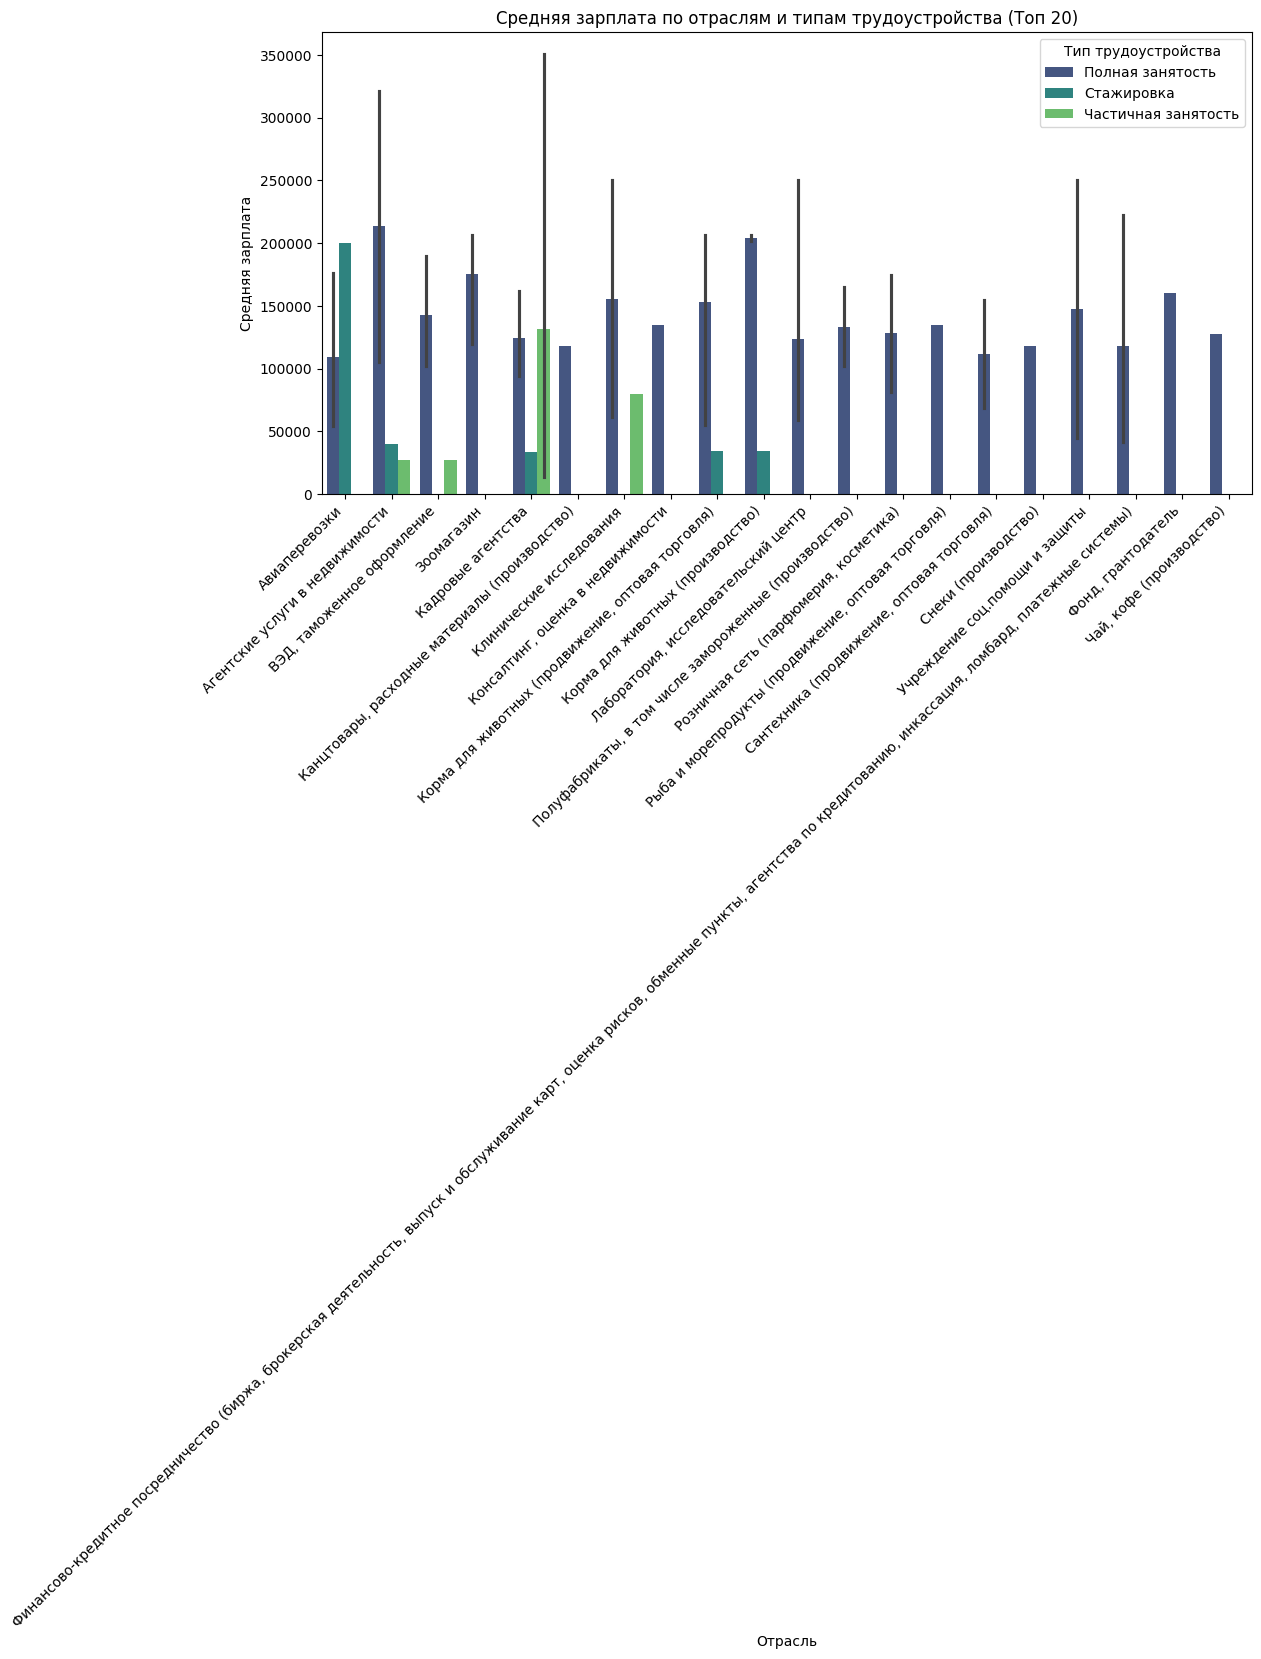

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем 20 отраслей с наивысшей средней зарплатой
top_industries = df.groupby('industry_name')['avg_salary'].mean().nlargest(20).index
filtered_df = df[df['industry_name'].isin(top_industries)]

# Построим график
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='industry_name', y='avg_salary', hue='employment', palette='viridis')
plt.title('Средняя зарплата по отраслям и типам трудоустройства (Топ 20)')
plt.xlabel('Отрасль')
plt.ylabel('Средняя зарплата')
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки для лучшей читаемости
plt.legend(title='Тип трудоустройства')
plt.tight_layout()
plt.show()

График показывает среднюю зарплату по 20 отраслям и трем типам трудоустройства (полная занятость, стажировка, частичная занятость). На основе предоставленного графика можно сделать следующие выводы:

Разброс зарплат значителен: В каждой отрасли наблюдается существенный разброс зарплат, что видно по длине вертикальных линий (усиков) на графике. Это указывает на наличие как высокооплачиваемых, так и низкооплачиваемых позиций внутри одной и той же сферы деятельности.

Полная занятость — самая высокооплачиваемая: В большинстве отраслей средняя зарплата при полной занятости значительно выше, чем при стажировке и частичной занятости.

Стажировки обычно низкооплачиваемые: Зарплаты на стажировках, как правило, самые низкие среди представленных типов трудоустройства.

Отраслевые различия: Существуют значительные различия в средней зарплате между отраслями. Некоторые отрасли демонстрируют значительно более высокие средние зарплаты, чем другие. Например, в некоторых областях средняя зарплата превышает 200 000, в то время как в других она находится на уровне значительно ниже 100 000.

Частичная занятость — не всегда низкооплачиваемая: В некоторых отраслях зарплата при частичной занятости сравнима с зарплатой на стажировке, а в некоторых приближается к уровню полной занятости. Это говорит о том, что тип занятости не единственный фактор, определяющий уровень заработной платы.

In [ ]:
# не забываем закрыть соединение после окончания работы
connection.close()